## Objectives

HR agency studies trends in the IT labor market. The company intends to conduct a research on the basis of data referring to data science salaries in 2020-2022 and reach the conclusions.

Let's see what influences a data scientist salary and answer the following questions:

- Is there yearly growth in data scientists' salaries?
- What is the relation between salaries of data scientists and data engineers in 2022?
- What is the relation between salaries of data scientists in various sized companies?
- Is there a relation between number of job positions as a data scientist/data engineer and company size?


For significance level we'll take $\alpha=0.05$.

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme("notebook") 
sns.set_palette("deep") 

## Loading data

In [3]:
data = pd.read_csv('./ds_salaries.csv', index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Initial data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Checking the data for duplicates:

In [5]:
print('Number of duplicates: {}'.format(data[data.duplicated()].shape[0]))

# removing:
data = data.drop_duplicates()
print('Table size after removing duplicate entries: {}'.format(data.shape))

Number of duplicates: 42
Table size after removing duplicate entries: (565, 11)


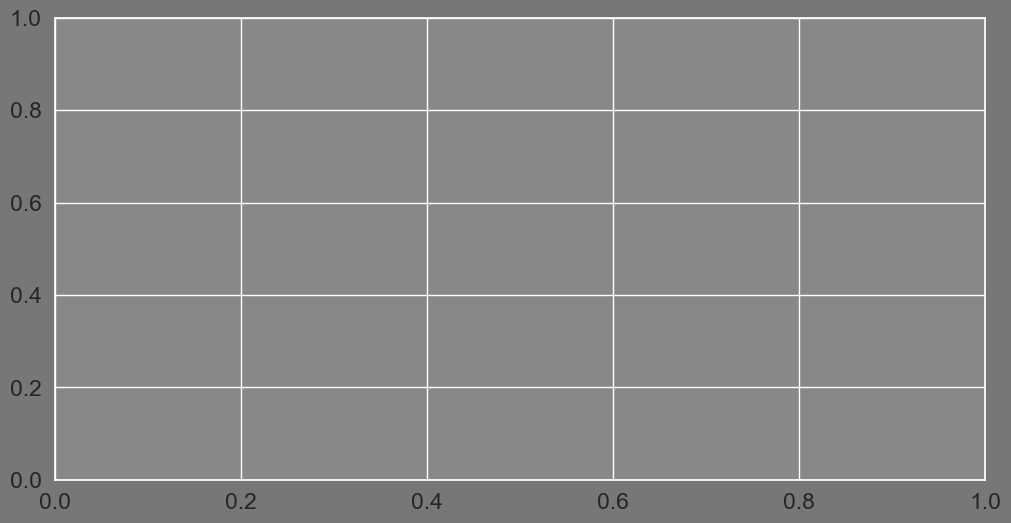

In [6]:
#optional dark theme customization
sns.set(font_scale=1.5, rc={'axes.facecolor':'#888888', 'figure.facecolor':'#777777', 'figure.figsize':(12,6)})    
fig, ax = plt.subplots(figsize=(12, 6))

Let's check job positions in the data

In [7]:
data.job_title.value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

And select the relevant

In [8]:
data_relev = data.loc[(data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')] 

In [9]:
#pointing out arrays for DS/DE
salary_science = data_relev.loc[data_relev['job_title']=='Data Scientist', 'salary_in_usd'] 
salary_engin = data_relev.loc[data_relev['job_title']=='Data Engineer', 'salary_in_usd'] 

In [10]:
#and dataframes for DS/DE for further use
data_relev_sci = data_relev.loc[(data_relev['job_title']=='Data Scientist')]
data_relev_eng = data_relev.loc[(data_relev['job_title']=='Data Engineer')]

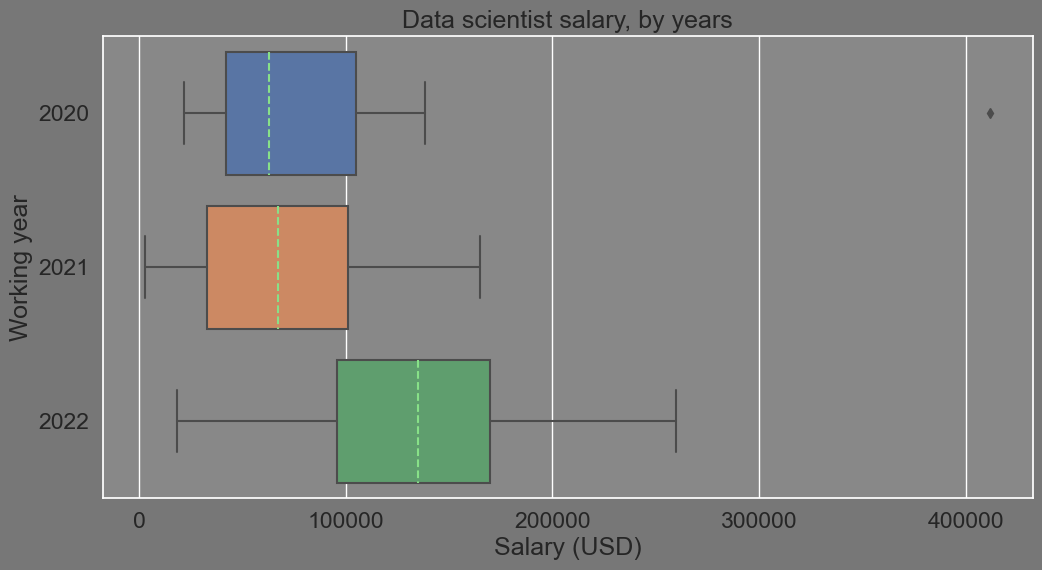

In [11]:
#having a look at DS salaries by years

g = sns.boxplot(data=data_relev_sci, x='salary_in_usd', y='work_year', orient='h',medianprops={"color": "#88E188", "linestyle": '--'})   
g.set(ylabel="Working year", xlabel="Salary (USD)")
plt.title('Data scientist salary, by years')
plt.show()

We definitely can see salary growth in 2022. Statistical significance can be confirmed with the tests.

Let's have a look at the other distributions for data scientists.

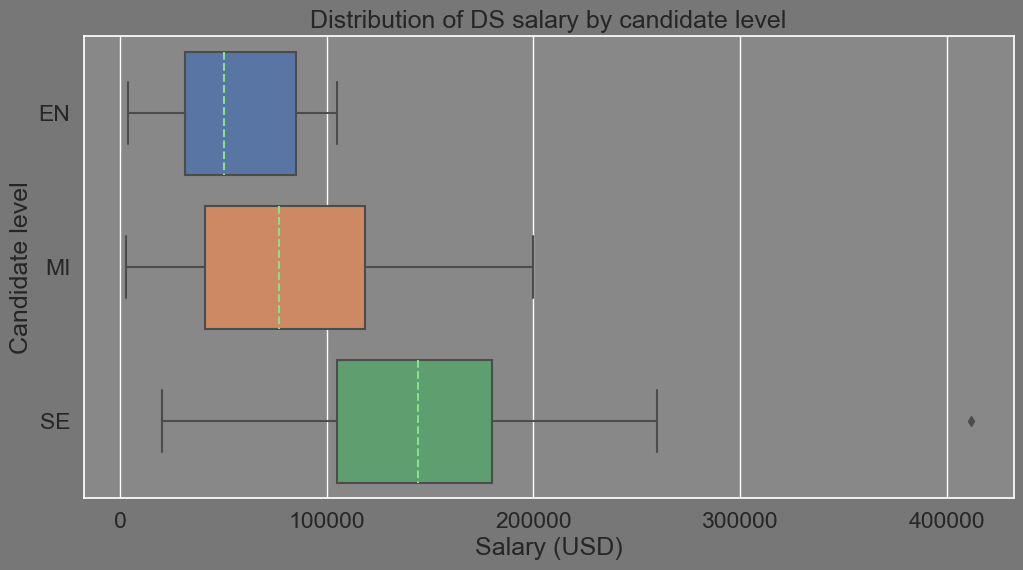

In [12]:
#distribution by candidate experience
g = sns.boxplot(data=data_relev_sci, x='salary_in_usd', y='experience_level', orient='h',medianprops={"color": "#88E188", "linestyle": '--'}, order=['EN', 'MI', 'SE'])   
g.set(ylabel="Candidate level", xlabel="Salary (USD)")
plt.title('Distribution of DS salary by candidate level')
plt.show()

As one could expect, seniors have significant advantage in terms of salary.

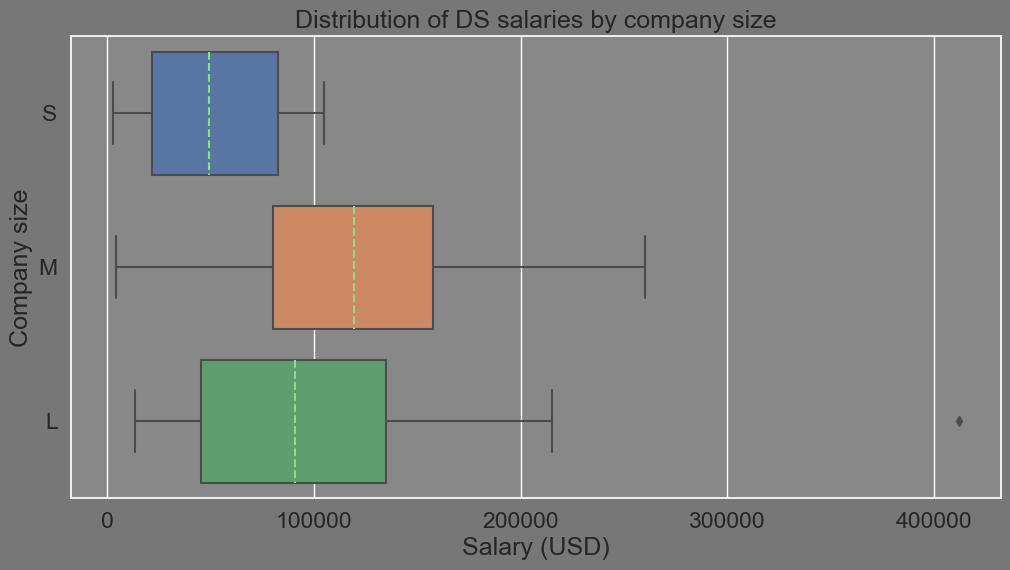

In [13]:
#distribution by company size
g = sns.boxplot(data=data_relev_sci, x='salary_in_usd', y='company_size', orient='h',medianprops={"color": "#88E188", "linestyle": '--'}, order=['S', 'M', 'L'])   
g.set(ylabel="Company size", xlabel="Salary (USD)")
plt.title('Distribution of DS salaries by company size')
plt.show()

It seems that the largest salaries for data scientists are paid by medium-sized companies. To be certain, we need to do statistical tests, though.

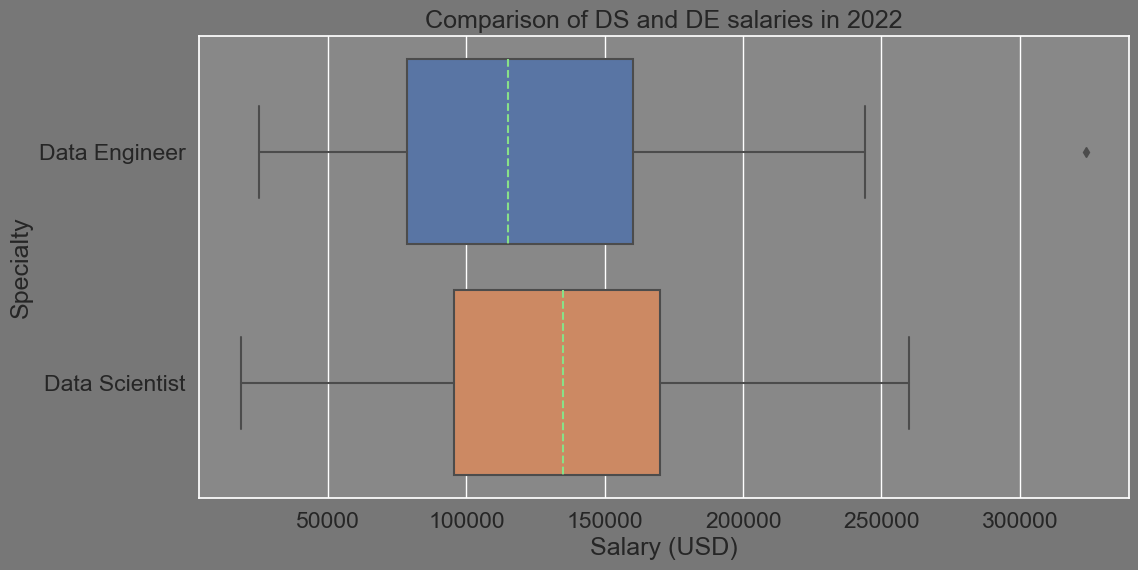

In [14]:
#comparing salaries for DS and DE in 2022
mask22 = data_relev['work_year']==2022
data_relev22 = data_relev.loc[mask22]
g = sns.boxplot(data=data_relev22, x='salary_in_usd', y='job_title', orient='h',medianprops={"color": "#88E188", "linestyle": '--'})   
g.set(ylabel="Specialty", xlabel="Salary (USD)")
plt.title('Comparison of DS and DE salaries in 2022')
plt.show()

Visually, it seems as if salaries for data scientists are higher in 2022, but it is better to confirm statistical significance through tests.

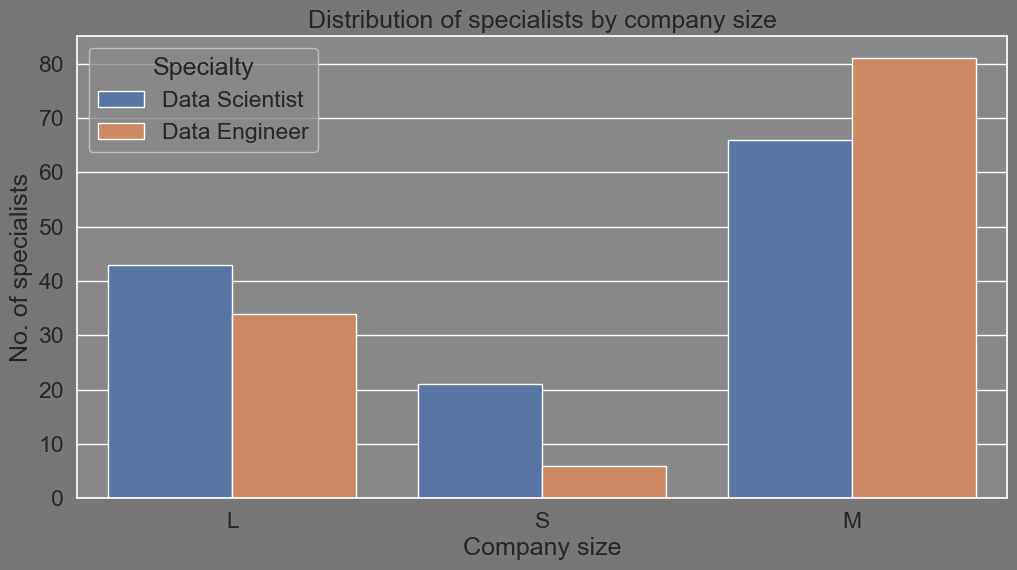

In [15]:
#comparing number of specialists in companies of different sizes
gr = sns.countplot(data=data_relev, x=data_relev['company_size'], hue='job_title')
gr.set(xlabel='Company size', ylabel='No. of specialists')
ax = plt.gca()
ax.legend(title="Specialty")
plt.title('Distribution of specialists by company size')
plt.show()

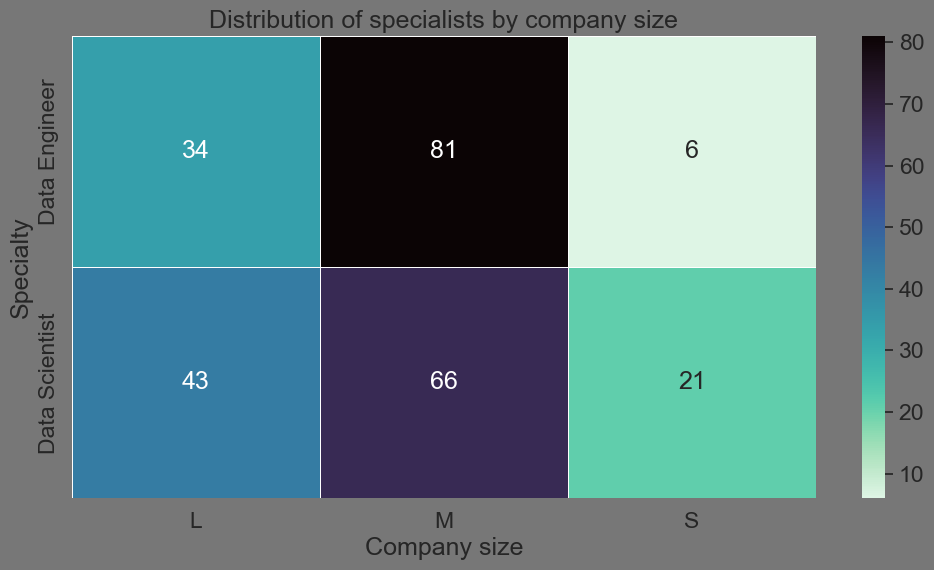

In [16]:
cross_tab = pd.crosstab(index=data_relev['job_title'], columns=data_relev['company_size'])

my_palette = sns.color_palette("mako", as_cmap=True)
reversed_palette = my_palette.reversed()
ax = sns.heatmap(cross_tab, cmap=reversed_palette, annot=True, linewidth=.5, fmt='d')
ax.set(xlabel='Company size', ylabel='Specialty')
plt.title('Distribution of specialists by company size')
plt.show()

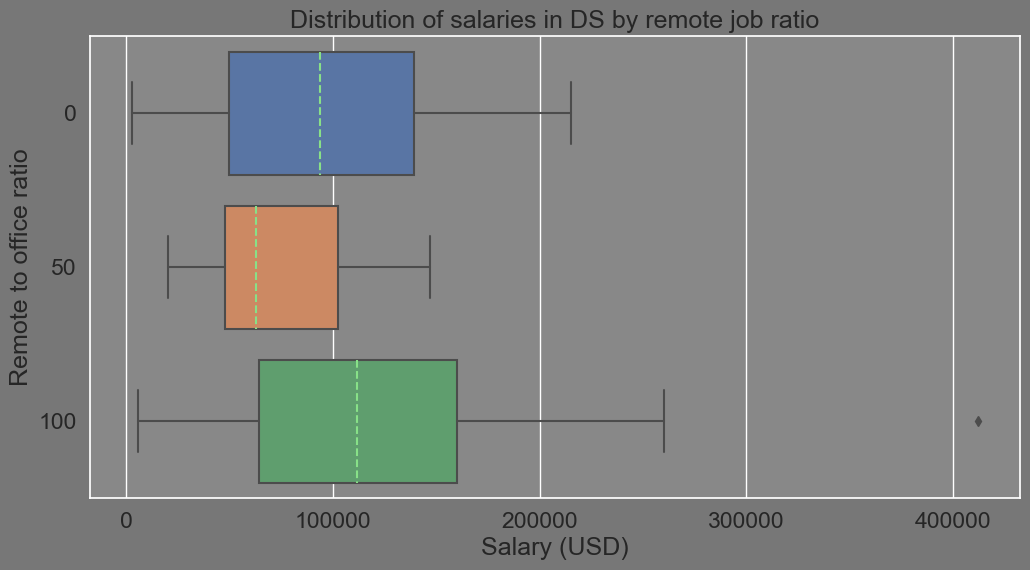

In [17]:
#having a look at relation b/w income and workplace
g = sns.boxplot(data=data_relev_sci, x='salary_in_usd', y='remote_ratio', orient='h',medianprops={"color": "#88E188", "linestyle": '--'})   
g.set(ylabel="Remote to office ratio", xlabel="Salary (USD)")
plt.title('Distribution of salaries in DS by remote job ratio')
plt.show()

It is interesting to see how remote DS workers have even bigger salaries than those in office.

Out of curiosity, we can check relation between salary and a country, although, in our table, mostly US data is presented.

In [18]:
#checking top 3 countries for amount of DS specialists and companies
top_3_employ = data_relev_sci.employee_residence.value_counts().head(3)
top_3_country = data_relev_sci.company_location.value_counts().head(3)
print(top_3_employ)
print(top_3_country)

employee_residence
US    66
GB    11
IN     9
Name: count, dtype: int64
company_location
US    72
GB    11
IN     8
Name: count, dtype: int64


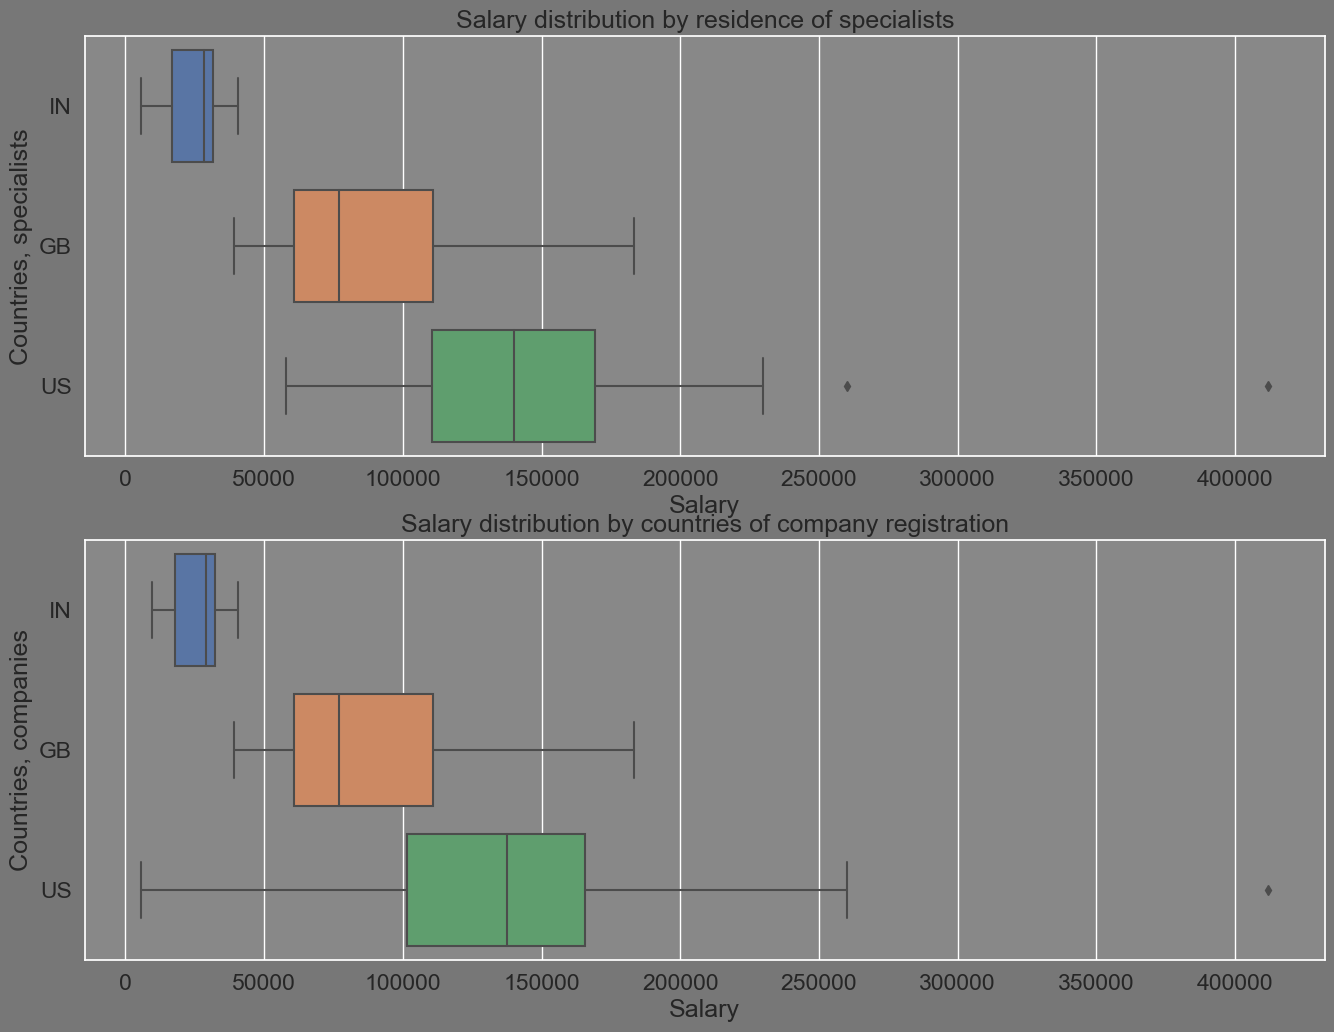

In [19]:
residence_3 = data_relev_sci.employee_residence.value_counts().nlargest(3).index
filtered_employee = data_relev_sci[data_relev_sci['employee_residence'].isin(residence_3)]
location_3 = data_relev_sci.company_location.value_counts().nlargest(3).index
filtered_companies = data_relev_sci[data_relev_sci['company_location'].isin(location_3)]

fig, axes = plt.subplots(2, 1, figsize=(16, 12))
sns.boxplot(data=filtered_employee, x='salary_in_usd', y='employee_residence', orient='h', ax=axes[0], order=['IN','GB', 'US'])  
axes[0].set(xlabel='Salary', ylabel='Countries, specialists')
axes[0].set_title('Salary distribution by residence of specialists')

sns.boxplot(data=filtered_companies, x='salary_in_usd', y='company_location', orient='h', ax=axes[1], order=['IN','GB', 'US'])
axes[1].set(xlabel='Salary', ylabel='Countries, companies')
axes[1].set_title('Salary distribution by countries of company registration')

plt.show()

Despite visual prevalence of the USA, it seems unfeasible to make conclusions from such a disproportionate selection.

## Statistical data analysis

In [20]:
#implementing functions to print out decisions
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-value below significance level of {:.2f}. Distribution is not normal'.format(alpha))
    else:
        print('p-value above significance level of {:.2f}. Distribution is normal'.format(alpha))


# for null hypothesis
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-value below significance level of {:.2f}. Rejecting null hypothesis in favor of the alternative.'.format(alpha))
    else:
        print('p-value above significance level of {:.2f}. Inconclusive evidence to reject null hypothesis.'.format(alpha))
#for bartlett/levene tests        
def decision_variance(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-value below significance level of {:.2f}. Samples have different variance values.'.format(alpha))
    else:
        print('p-value above significance level of {:.2f}. Samples have similar variance values.'.format(alpha))

In [21]:
# introducing significance level
alpha = 0.05
print("Significance level alpha = {:.2f}".format(alpha))

Significance level alpha = 0.05


### Is there yearly growth of salaries of data scientists?

**Stating null and alternative hypotheses**

*Null hypothesis* ($H_0$): salaries of data scientists in 2021 (or 2022) ($μ_1$) are statistically less than or equal to the salaries in the previous year ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Alternative hypothesis* ($H_1$): salaries of data scientists in 2021 (or 2022) ($μ_1$) are statistically greater than the salaries in the previous year ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

Due to the objective of the task we are not adopting ANOVA test for multiple groups, as it is more simple to check salary growth while comparing years 20-21 and 21-22, respectively.

**Normality test**

Checking normality of quantitative attribute distribution with Shapiro-Wilk test:

*Null hypothesis* ($H_0$): data distribution is normal.

*Alternative hypothesis* ($H_1$): data distribution is skewed.

In [22]:
# salary arrays
mask20 = data_relev_sci['work_year']==2020
mask21 = data_relev_sci['work_year']==2021
mask22 = data_relev_sci['work_year']==2022
DS_salary20 = data_relev_sci.loc[mask20, 'salary_in_usd']
DS_salary21 = data_relev_sci.loc[mask21, 'salary_in_usd']
DS_salary22 = data_relev_sci.loc[mask22, 'salary_in_usd']

# 
print('For salaries in 2020:')
result = stats.shapiro(DS_salary20)
decision_normality(result[1])

print('For salaries in 2021:')
result = stats.shapiro(DS_salary21)
decision_normality(result[1])

print('For salaries in 2022:')
result = stats.shapiro(DS_salary22)
decision_normality(result[1])

For salaries in 2020:
p-value = 0.000
p-value below significance level of 0.05. Distribution is not normal
For salaries in 2021:
p-value = 0.107
p-value above significance level of 0.05. Distribution is normal
For salaries in 2022:
p-value = 0.676
p-value above significance level of 0.05. Distribution is normal


**Selecting statistical tests**

The attribute "data scientist salary" is quantitative. Whereas we should find out the growth of the salaries, two tests should be conducted. Groups will be deemed independent (we can't say if the salaries are for the same people along the timeline). Therefore, we select Mann-Whitney U criterium for years 2020 and 2021, with skewed distribution in one of them, and T-test for 21 and 22, as in this case both samples are distributed normally.

In [23]:
#comparing the first pair
stat, pvalue = stats.mannwhitneyu(DS_salary20, DS_salary21, alternative='greater')
decision_hypothesis(pvalue)

p-value = 0.299
p-value above significance level of 0.05. Inconclusive evidence to reject null hypothesis.


In [24]:
#checking similarity of variance
stat, pvalue = stats.bartlett(DS_salary21, DS_salary22)
decision_variance(pvalue)

p-value = 0.168
p-value above significance level of 0.05. Samples have similar variance values.


In [25]:
#comparing the second pair
stat, pvalue = stats.ttest_ind(DS_salary21, DS_salary22, alternative='less')
decision_hypothesis(pvalue)

p-value = 0.000
p-value below significance level of 0.05. Rejecting null hypothesis in favor of the alternative.


In [26]:
data_agg = data_relev_sci.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Salary by years')
data_agg

Salary by years


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


On the basis of statistical tests we can make a conclusion that data scientists' salaries had no statistically significant growth in 2021, but increased in 2022, as also can be seen quite well in the table with descriptive statistics above. Median growth is evident, but also there is impressive increase both in 25th and 75th percentiles.

### What is the relation between salaries of data scientists and data engineers in 2022?

*Null hypothesis* ($H_0$): salaries of data scientists in 2022 ($μ_1$) are statistically equal to salaries of data engineers ($μ_2$).

$$ H_0 : μ_1 = μ_2$$

*Alternative hypothesis* ($H_1$): salaries of data scientists in 2022 ($μ_1$) are statistically not equal to salaries of data engineers ($μ_2$).

$$ H_1 : μ_1 <> μ_2$$


In [27]:
salary_sci22 = data_relev_sci.loc[(data_relev_sci['work_year']==2022), 'salary_in_usd']
salary_eng22 = data_relev_eng.loc[(data_relev_eng['work_year']==2022), 'salary_in_usd']

# checking distribution
print('For data scientists in 2022:')
result = stats.shapiro(salary_sci22)
decision_normality(result[1])

print('For data engineers in 2022:')
result = stats.shapiro(salary_eng22)
decision_normality(result[1])

For data scientists in 2022:
p-value = 0.676
p-value above significance level of 0.05. Distribution is normal
For data engineers in 2022:
p-value = 0.007
p-value below significance level of 0.05. Distribution is not normal


Selecting Mann-Whitney test for independent quantitative attributes with one attribute having abnormal distribution.

In [28]:
stat, pvalue = stats.mannwhitneyu(salary_sci22, salary_eng22)
decision_hypothesis(pvalue)

p-value = 0.319
p-value above significance level of 0.05. Inconclusive evidence to reject null hypothesis.


We cannot say that salary of a data scientist in 2022 is different from the salary of a data engineer.

### What is the relation between salaries of data scientists in various sized companies?

**Stating null and alternative hypotheses**

*Null hypothesis*: salaries of data scientists have no differences in various sized companies: small ($μ_1$), medium ($μ_2$), large ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Alternative hypothesis*: salaries of data scientists in various sized companies are not the same.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

In [29]:
salary_sci_sm = data_relev_sci.loc[(data_relev_sci['company_size']=='S'), 'salary_in_usd']
salary_sci_med = data_relev_sci.loc[(data_relev_sci['company_size']=='M'), 'salary_in_usd']
salary_sci_lrg = data_relev_sci.loc[(data_relev_sci['company_size']=='L'), 'salary_in_usd']

# checking distribution
print('For data scientists in small companies:')
result = stats.shapiro(salary_sci_sm)
decision_normality(result[1])

print('For data scientists in medium-sized companies:')
result = stats.shapiro(salary_sci_med)
decision_normality(result[1])

print('For data scientists in large companies:')
result = stats.shapiro(salary_sci_lrg)
decision_normality(result[1])

For data scientists in small companies:
p-value = 0.189
p-value above significance level of 0.05. Distribution is normal
For data scientists in medium-sized companies:
p-value = 0.897
p-value above significance level of 0.05. Distribution is normal
For data scientists in large companies:
p-value = 0.000
p-value below significance level of 0.05. Distribution is not normal


Let's see if distribution in the last group changes after removal of outliers (by interquantile range).

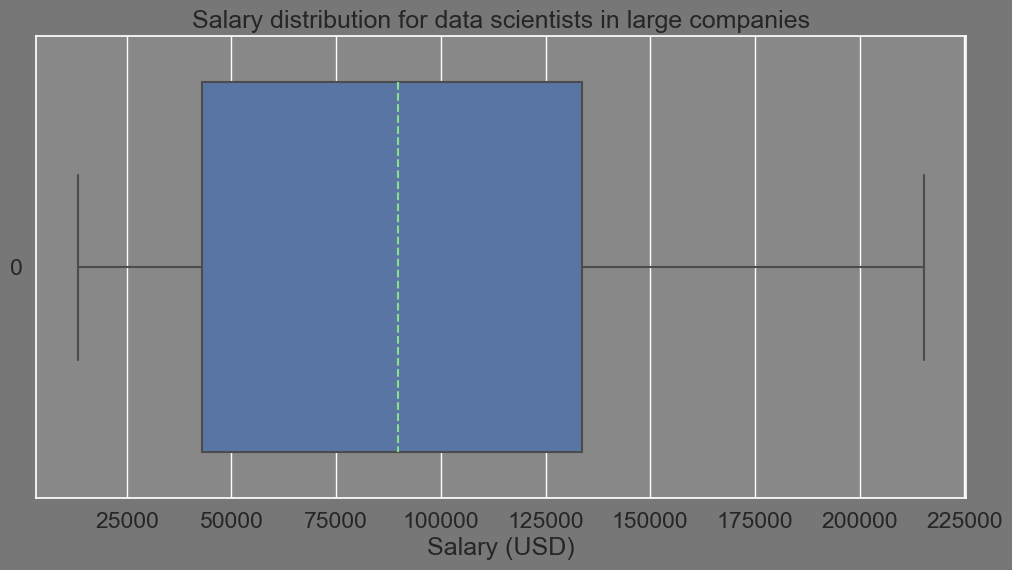

In [31]:
Q1 = salary_sci_lrg.quantile(0.25)
Q3 = salary_sci_lrg.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

salary_sci_lrg_avg = salary_sci_lrg[(salary_sci_lrg >= lower_bound) & (salary_sci_lrg <= upper_bound)]

g = sns.boxplot(data=salary_sci_lrg_avg, orient='h',medianprops={"color": "#88E188", "linestyle": '--'})   
g.set(xlabel="Salary (USD)")
plt.title('Salary distribution for data scientists in large companies')
plt.show()

In [32]:
print('For data scientist in large companies without outliers:')
result = stats.shapiro(salary_sci_lrg_avg)
decision_normality(result[1])

For data scientist in large companies without outliers:
p-value = 0.030
p-value below significance level of 0.05. Distribution is not normal


Distribution is not normal still, so we should use Kruskal-Wallis test.

In [33]:
stat, pvalue = stats.kruskal(salary_sci_sm, salary_sci_med, salary_sci_lrg)
decision_hypothesis(pvalue)

p-value = 0.000
p-value below significance level of 0.05. Rejecting null hypothesis in favor of the alternative.


Since we could expect such result from the graph, let's check less obvious ratio.

In [34]:
stat, pvalue = stats.mannwhitneyu(salary_sci_lrg, salary_sci_med, alternative='greater')
decision_hypothesis(pvalue)

p-value = 0.976
p-value above significance level of 0.05. Inconclusive evidence to reject null hypothesis.


On the basis of conducted statistical tests we can come to the conclusion that data scientists' salary is roughly the same in medium and large companies and it is less in smaller companies as we can see by medians in the graph and confirm through inequality in the test (Kruskal-Wallis).

### Is there a relation between number of job positions of a data scientist/data engineer and company size?
**Stating null and alternative hypotheses**

*Null hypothesis*: there is no connection between number of job positions of a data scientist/data engineer and company size, the features are independent.


*Alternative hypothesis*: there is a connection between number of job positions of a data scientist/data engineer and company size.


Job position (title) and company size are categorical attributes and there is no dependency between them. To check if there is a relation, we'll conduct a chi-square test.

In [35]:
#making a contingency table
cross_table = pd.crosstab(data_relev['job_title'], data_relev['company_size'])
cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [36]:
chi2_stat, pvalue, dof, expected = stats.chi2_contingency(cross_table)
decision_hypothesis(pvalue)

p-value = 0.005
p-value below significance level of 0.05. Rejecting null hypothesis in favor of the alternative.


**Conclusion**

On the basis of the test we can assume a statistically significant connection between number of specialties in question and company size.

## Summary

*   Salaries of data scientist did not increase in 2021, but went up in 2022 as was confirmed by the tests and can be seen from the statistics (median growth from 67 to 135 thousand, roughly twice, 25th and 75th percentiles also show great increase from 42-32 and 105-100 thousand to 95 and 170, respectively, and larger mean can be explained by the maximum outlier in 2020). It would be better, of course, if we had more data for 2020.
*   Salary of a data scientist in 2022 is about the same as salary of a data engineer. Despite some visual differences in median and 25 to 75 quantile range, the test says we don't have conclusive evidence of the difference.
*   Salary of data scientists is about the same in medium and large companies and in both cases it is larger than in small companies.
*   There is statistically significant connection between number of DS/DE jobs and company size.